In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_count = pd.read_csv("results/fashionMNIST/mnist_count.csv")
df_count

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.879338,0.467260,0.834056,116.157334,41,1059408000
1,1,2,0.452140,0.377076,0.870056,89.141597,36,1059408000
2,1,3,0.388018,0.371474,0.865944,94.951303,71,1059408000
3,1,4,0.348774,0.340555,0.874778,96.034588,37,1059408000
4,1,5,0.328926,0.332297,0.878944,102.362716,46,1059408000
...,...,...,...,...,...,...,...,...
75,5,12,0.239938,0.327462,0.879556,119.442661,36,1059408000
76,5,13,0.226630,0.305679,0.890278,119.050324,46,1059408000
77,5,14,0.218134,0.314020,0.885333,119.203877,44,1059408000
78,5,15,0.211862,0.308504,0.888111,118.958396,47,1059408000


In [6]:
df_original = pd.read_csv("results/fashionMNIST/mnist_original.csv")
df_original

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.886893,0.492615,0.828722,79.170780,0,0
1,1,2,0.449956,0.399425,0.853556,86.783231,0,0
2,1,3,0.380802,0.366613,0.868111,90.137203,0,0
3,1,4,0.344412,0.351374,0.872167,93.607840,0,0
4,1,5,0.314760,0.339587,0.878722,94.349250,0,0
...,...,...,...,...,...,...,...,...
75,5,12,0.227759,0.325615,0.883889,101.514537,0,0
76,5,13,0.220036,0.326235,0.885333,101.818666,0,0
77,5,14,0.212284,0.331616,0.882889,102.054071,0,0
78,5,15,0.205147,0.320305,0.887278,102.087158,0,0


In [7]:
df_diff = pd.read_csv("results/fashionMNIST/mnist_diff.csv")
df_diff

,execution,epoch,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call
0,1,1,0.853944,0.456119,0.833667,74.370581,0,0
1,1,2,0.439592,0.383524,0.860611,79.298833,0,0
2,1,3,0.375778,0.375845,0.857167,83.937960,0,0
3,1,4,0.341008,0.329586,0.879833,86.988136,0,0
4,1,5,0.317151,0.315881,0.882056,88.127768,0,0
...,...,...,...,...,...,...,...,...
75,5,12,0.225075,0.338334,0.878000,96.441570,0,0
76,5,13,0.214136,0.320734,0.885444,97.042804,0,0
77,5,14,0.211943,0.326109,0.887222,97.291840,0,0
78,5,15,0.204062,0.320308,0.886500,96.892167,0,0


In [8]:
# splitting training and test
df_count_train = df_count[df_count["epoch"] != -1]
df_count_test = df_count[df_count["epoch"] == -1]
df_original_train = df_original[df_original["epoch"] != -1]
df_original_test = df_original[df_original["epoch"] == -1]
df_diff_train = df_diff[df_diff["epoch"] != -1]
df_diff_test = df_diff[df_diff["epoch"] == -1]

In [9]:
# add relu proportion
df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
df_diff_train["relu_proportion"] = df_diff_train["zero_relu_call"] / df_diff_train["total_relu_call"]

/tmp/ipykernel_5043/561248041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_train["relu_proportion"] = df_count_train["zero_relu_call"] / df_count_train["total_relu_call"]
/tmp/ipykernel_5043/561248041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original_train["relu_proportion"] = df_original_train["zero_relu_call"] / df_original_train["total_relu_call"]
/tmp/ipykernel_5043/561248041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

## Frequência da ReLU

In [16]:
temp = df_count_train.groupby("execution").sum()
relu_proportion = temp["zero_relu_call"] / temp["total_relu_call"]
print(f"Proporção Média da ReLU: {relu_proportion.mean()}    1/{round(1/relu_proportion.mean()):_}")

Proporção Média da ReLU: 4.467904087314173e-08    1/22_381_859


<Axes: xlabel='epoch', ylabel='relu_proportion'>

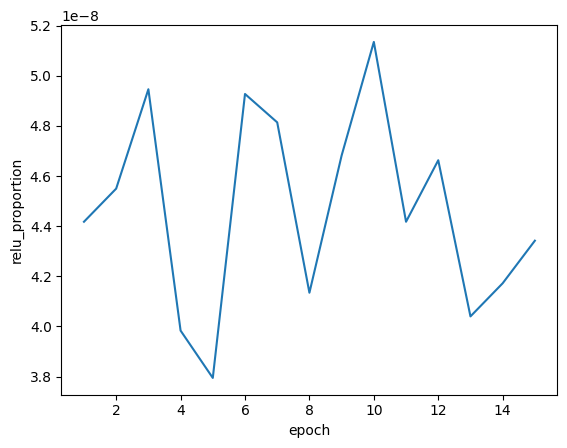

In [18]:
df_train_avg = df_count_train.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="relu_proportion")

## Eficiência do Modelo

In [19]:
print(f"Acurácia (teste) média: {round(100*df_count_test['val_acc'].mean(), 2)}%")

Acurácia (teste) média: 88.03%


<Axes: xlabel='epoch', ylabel='train_loss'>

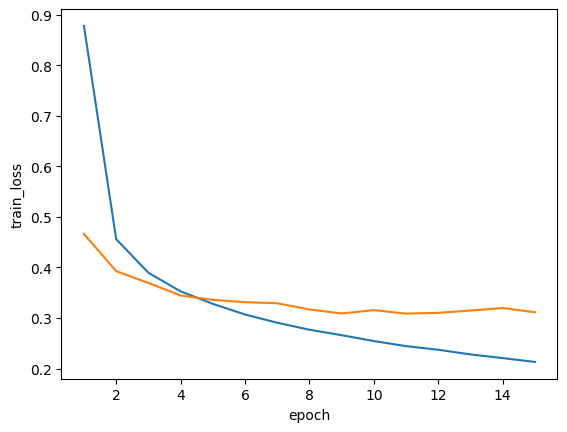

In [20]:
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")

In [24]:
df_train_sum = df_count_train.groupby("execution").sum()
seconds_avg = round(df_train_sum["time"].mean())
minutes_avg = seconds_avg // 60
seconds_avg = seconds_avg % 60
print(f"Tempo médio de treino: {minutes_avg}:{seconds_avg}")

Tempo médio de treino: 29:0


## Comparando com funções build-in

In [25]:
# acurácia média
acc_test = df_count_test["val_acc"].mean()
acc_test_original = df_original_test["val_acc"].mean()
diff = (acc_test - acc_test_original) / acc_test_original
print(acc_test, acc_test_original, diff)

0.88026 0.8809799999999999 -0.0008172716747256827


<Axes: xlabel='epoch', ylabel='train_loss'>

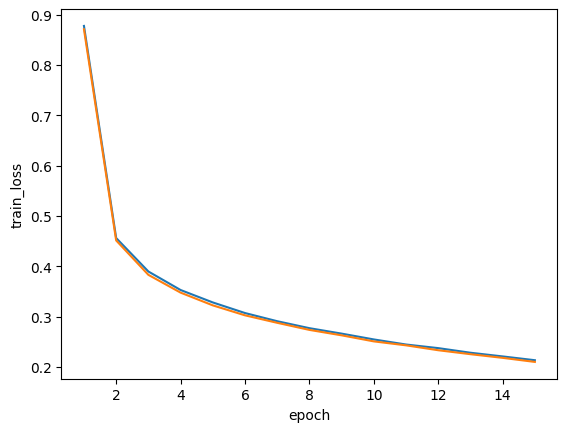

In [26]:
df_train_avg = df_count_train.groupby("epoch").mean()
df_train_avg_original = df_original_train.groupby("epoch").mean()
sns.lineplot(data=df_train_avg, x="epoch", y="train_loss")
sns.lineplot(data=df_train_avg_original, x="epoch", y="train_loss")

<Axes: xlabel='epoch', ylabel='val_loss'>

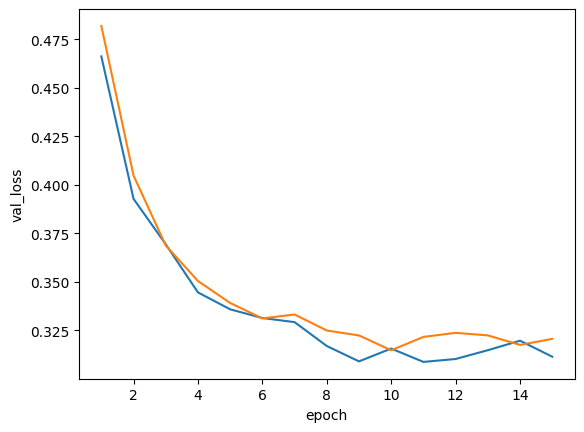

In [27]:
sns.lineplot(data=df_train_avg, x="epoch", y="val_loss")
sns.lineplot(data=df_train_avg_original, x="epoch", y="val_loss")

<Axes: xlabel='epoch', ylabel='value'>

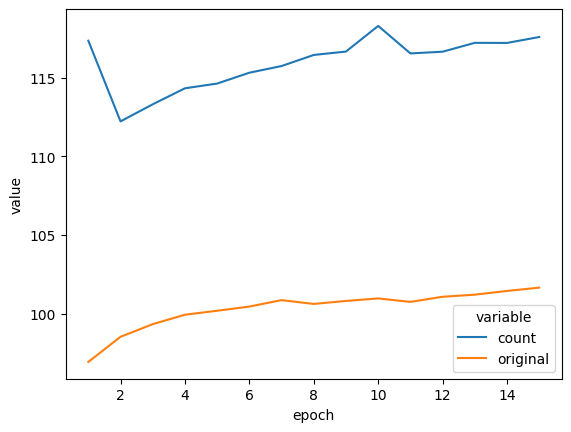

In [37]:
temp = pd.DataFrame()
temp["count"] = df_train_avg["time"]
temp["original"] = df_train_avg_original["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
sns.lineplot(data=temp, x="epoch", y="value", hue="variable")

## Comparando com funções diferenciáveis

In [39]:
df_train_avg_diff = df_diff_train.groupby("epoch").mean()
df_train_avg_diff

,execution,train_loss,val_loss,val_acc,time,zero_relu_call,total_relu_call,relu_proportion
epoch,,,,,,,,
1,3.0,0.838950,0.456994,0.834522,96.184144,0.0,0.0,NaN
2,3.0,0.438418,0.396304,0.854633,97.733898,0.0,0.0,NaN
3,3.0,0.377706,0.366556,0.865044,98.409807,0.0,0.0,NaN
4,3.0,0.340200,0.340901,0.874344,99.101633,0.0,0.0,NaN
5,3.0,0.318049,0.325801,0.879722,99.201744,0.0,0.0,NaN
6,3.0,0.296882,0.323698,0.881567,99.369899,0.0,0.0,NaN
7,3.0,0.281316,0.320749,0.883222,99.733082,0.0,0.0,NaN
8,3.0,0.266553,0.320099,0.882989,100.004872,0.0,0.0,NaN
9,3.0,0.252462,0.316583,0.885033,100.296605,0.0,0.0,NaN


Text(0.5, 1.0, 'Tempo por Epoca')

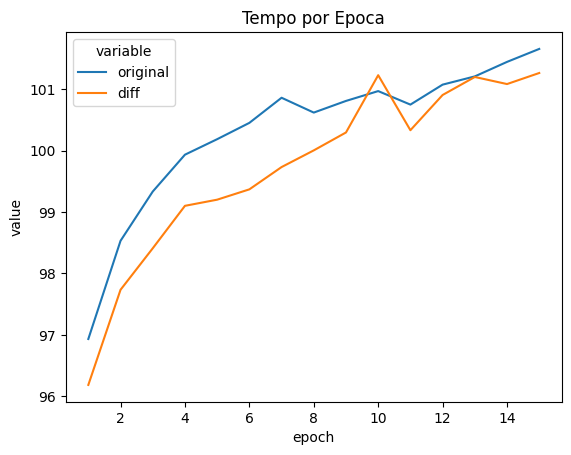

In [41]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["time"]
temp["diff"] = df_train_avg_diff["time"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Tempo por Epoca")

Text(0.5, 1.0, 'Loss (Treino) por Epoca')

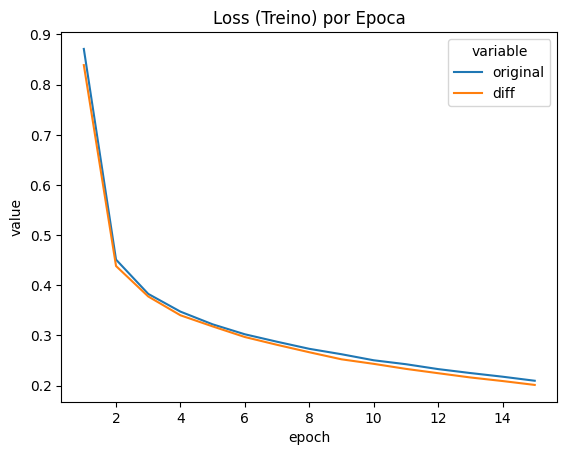

In [42]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["train_loss"]
temp["diff"] = df_train_avg_diff["train_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Treino) por Epoca")

Text(0.5, 1.0, 'Loss (Validacao) por Epoca')

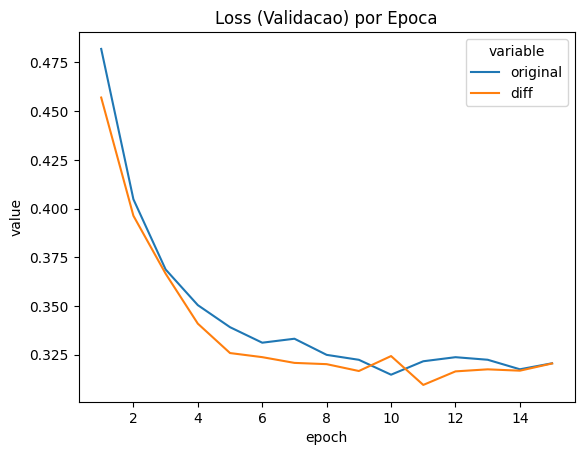

In [43]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_loss"]
temp["diff"] = df_train_avg_diff["val_loss"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Loss (Validacao) por Epoca")

Text(0.5, 1.0, 'Acurácia (Validacao) por Epoca')

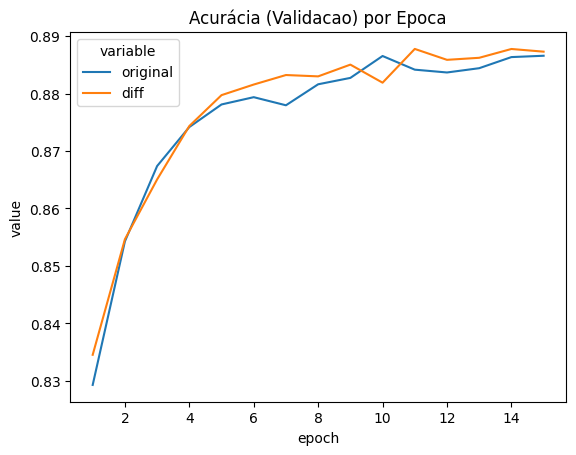

In [44]:
temp = pd.DataFrame()
temp["original"] = df_train_avg_original["val_acc"]
temp["diff"] = df_train_avg_diff["val_acc"]
temp["epoch"] = df_train_avg.index
temp = pd.melt(temp, ["epoch"])
ax = sns.lineplot(data=temp, x="epoch", y="value", hue="variable")
ax.set_title("Acurácia (Validacao) por Epoca")

## Testando funções de ativação

In [52]:
from torch import nn
import torch
from time import time

In [53]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [54]:
relu = nn.ReLU()
gelu = nn.GELU()
relu.to(device)
gelu.to(device)

GELU(approximate='none')

In [82]:
def test_activation(activation1, activation2, device, N=1_000_000, executions=10):
    total1, total2 = 0, 0
    for _ in range(executions):
        values = torch.rand(N, device=device)
        time1 = time()
        ans1 = activation1(values)
        time1 = time() - time1

        time2 = time()
        ans2 = activation2(values)
        time2 = time() - time2

        total1 += time1
        total2 += time2
    return total1 / executions, total2 / executions

In [84]:
N = 10_000_000
EXECUTIONS = 100
time_relu, time_gelu = test_activation(relu, gelu, device, N=N, executions=EXECUTIONS)

In [85]:
time_relu, time_gelu

(0.006377043724060058, 0.006896347999572754)

In [86]:
(time_gelu - time_relu) / time_relu

0.0814333879432885

In [87]:
hardswish = nn.Hardswish()
swish = nn.SiLU()
hardswish.to(device)
swish.to(device)

SiLU()

In [89]:
N = 10_000_000
EXECUTIONS = 100
time_hs, time_s = test_activation(relu, gelu, device, N=N, executions=EXECUTIONS)

In [90]:
time_hs, time_s

(0.0071539473533630375, 0.007825078964233399)

In [93]:
(time_s - time_hs) / time_hs

0.09381276905188092